In [8]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import numpy as np
from cifar10_utils import load_cifar10, mean_std_normalization_per_pixels, cifar10_compile, show_accuracy
from BasicCNN_model import BasicCNN
from ResNet_model import ResNet
from GCNN_model import GResNet

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Get train, test datasets
======

In [2]:
image_datas, label_datas = load_cifar10(path = 'cifardata/cifar-10-batches-py/')

train_datas = np.array(image_datas[:5]).reshape([-1,32,32,3])
train_labels = np.array(label_datas[:5]).reshape([-1])
test_datas = np.array(image_datas[5])
test_labels = np.array(label_datas[5])

print('train shape: ', train_datas.shape)
print('test shape: ',test_datas.shape)

train_datas, test_datas = mean_std_normalization_per_pixels(train_datas, test_datas, False)

image shape:  (6, 10000, 32, 32, 3)
label shape:  (6, 10000)
train shape:  (50000, 32, 32, 3)
test shape:  (10000, 32, 32, 3)


Model compile
======

1. BasicCNN

In [16]:
filter_num = 48
number_n = 0
weight_decay = 0.0005
num_classes = 10
batch_size = 100

tf.reset_default_graph()

sess = tf.Session()

global_step = tf.Variable(0, trainable=False)
lr = tf.train.exponential_decay(learning_rate = 1e-3,
                                global_step = global_step,
                                decay_steps = 1000,
                                decay_rate= 0.96,
                                staircase=True)

# global_step = tf.Variable(0, trainable=False)
# boundaries = [int(5000*num_classes/batch_size*30), int(5000*num_classes/batch_size*60), int(5000*num_classes/batch_size*90)]
# values = [0.02, 0.004, 0.0008, 0.00016]
# lr = tf.train.piecewise_constant(global_step, boundaries, values)

model = BasicCNN(number_n = number_n, num_classes=num_classes,weight_decay = weight_decay,
                 filter_num=filter_num, dropout = False, res_initializer = None)

optimizer = tf.train.AdamOptimizer(lr).minimize(model.loss, global_step = global_step)
# optimizer = tf.train.MomentumOptimizer(lr,momentum= 0.9).minimize(model.loss, global_step = global_step)

model.train(optimizer = optimizer)
sess.run(tf.global_variables_initializer())
model_compile = cifar10_compile(model, sess, train_datas, train_labels,test_datas, test_labels, 
                                batch_size = batch_size)

2. ResNet

In [4]:
filter_num = 16
number_n = 3
weight_decay = 0.0005
num_classes = 10
batch_size = 100

tf.reset_default_graph()

sess = tf.Session()

global_step = tf.Variable(0, trainable=False)
lr = tf.train.exponential_decay(learning_rate = 1e-3,
                                global_step = global_step,
                                decay_steps = 1000,
                                decay_rate= 0.96,
                                staircase=True)

# global_step = tf.Variable(0, trainable=False)
# boundaries = [int(5000*num_classes/batch_size*60), int(5000*num_classes/batch_size*120), int(5000*num_classes/batch_size*160)]
# values = [0.02, 0.004, 0.0008, 0.00016]
# lr = tf.train.piecewise_constant(global_step, boundaries, values)

model = ResNet(number_n = number_n, num_classes=num_classes,weight_decay = weight_decay,
                 filter_num=filter_num, dropout = False)

optimizer = tf.train.AdamOptimizer(lr).minimize(model.loss, global_step = global_step)
# optimizer = tf.train.MomentumOptimizer(lr,momentum= 0.9).minimize(model.loss, global_step = global_step)

model.train(optimizer = optimizer)
sess.run(tf.global_variables_initializer())
model_compile = cifar10_compile(model, sess, train_datas, train_labels,test_datas, test_labels, 
                                batch_size = batch_size)

3. GCNN

In [9]:
# filters=[11, 23, 45]
filters = [4,8,16]
number_n = 3
weight_decay = 0.0005
num_classes = 10
batch_size = 100

tf.reset_default_graph()

sess = tf.Session()

global_step = tf.Variable(0, trainable=False)
lr = tf.train.exponential_decay(learning_rate = 1e-3,
                                global_step = global_step,
                                decay_steps = 1000,
                                decay_rate= 0.96,
                                staircase=True)

# global_step = tf.Variable(0, trainable=False)
# boundaries = [int(5000*num_classes/batch_size*60), int(5000*num_classes/batch_size*120), int(5000*num_classes/batch_size*160)]
# values = [0.02, 0.004, 0.0008, 0.00016]
# lr = tf.train.piecewise_constant(global_step, boundaries, values)

model = GResNet(number_n = number_n, num_classes=num_classes,weight_decay = weight_decay,
                 filters=filters, dropout = False)

optimizer = tf.train.AdamOptimizer(lr).minimize(model.loss, global_step = global_step)
# optimizer = tf.train.MomentumOptimizer(lr,momentum= 0.9).minimize(model.loss, global_step = global_step)

model.train(optimizer = optimizer)
sess.run(tf.global_variables_initializer())
model_compile = cifar10_compile(model, sess, train_datas, train_labels,test_datas, test_labels, 
                                batch_size = batch_size)

(3, 3, 3, 4)
(3, 3, 32, 4)
(3, 3, 32, 4)
(3, 3, 32, 4)
(3, 3, 32, 4)
(3, 3, 32, 4)
(3, 3, 32, 4)
(3, 3, 32, 8)
(3, 3, 64, 8)
(3, 3, 64, 8)
(3, 3, 64, 8)
(3, 3, 64, 8)
(3, 3, 64, 8)
(3, 3, 64, 16)
(3, 3, 128, 16)
(3, 3, 128, 16)
(3, 3, 128, 16)
(3, 3, 128, 16)
(3, 3, 128, 16)


Training Model
=======

In [10]:
start_epoch = 0
end_epoch = 3
num_epochs = end_epoch-start_epoch

print('first learning rate:',sess.run(lr))
model_compile.train(start_epoch, end_epoch)
print('last learning rate:',sess.run(lr))

learning rate: 0.001


KeyboardInterrupt: 

Saving model
=======

In [ ]:
# import time
# time_now = time.strftime('%Y_%m_%d_%H_%M', time.localtime(time.time()))
# SAVER_DIR = 'model'
# saver = tf.train.Saver()
# checkpoint_path = os.path.join(SAVER_DIR, "BasicCNN_{}\BasicCNN_{}".format(time_now, time_now))
# saver.save(sess, checkpoint_path)

Showing accuracy graph
======

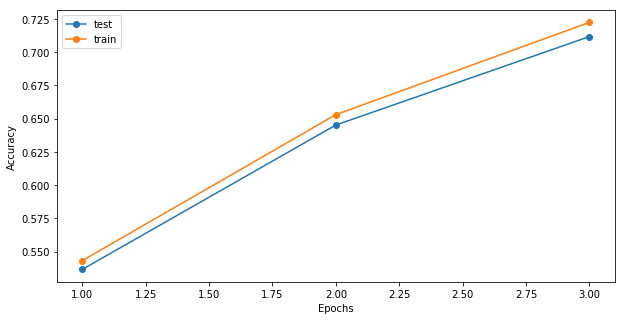

In [6]:
show_accuracy(num_epochs, model_compile.test_acc_list, model_compile.train_acc_list)